Кошелев А

#
## Урок 9. Инструменты разметки наборов данных.  
#### Задание 1.

Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

##### Источник датасета:

https://www.kaggle.com/datasets/coltonbarger/rotten-tomatoes-reviews-for-online-streaming-shows

##### Описание датасета:  
Обзоры сайта-агрегатора рецензий Rotten Tomatoes на онлайн-трансляции шоу.

Это сборник отзывов критиков и зрителей о 685 различных онлайн-трансляциях Rotten Tomatoes.
Информация была собрана за неделю, начиная с 10 июля 2022 года.
Отзывы, обнаруженные в файлах, в большинстве случаев являются предварительными просмотрами, особенно если рецензия критика длинная.
Также имеются дубликаты некоторых отзывов в случае, если шоу доступно на нескольких онлайн-сервисах потоковой передачи (платных или подписочных).

Были собраны данные о 100 самых популярных шоу на 9 потоковых платформах:
"Apple TV+", "Paramount+", "HBO MAX", "Disney+", "Prime Video", "Hulu", "Netflix", "Peacock" и "VUDU".
Не для всех шоу имеются отзывы о сервисе. Многие шоу остались без отзывов ни от критиков, ни от зрителей. На некоторых платформах также отсутствуют 100 шоу из-за их более позднего выхода. Например, это относится к Apple TV+.
Кроме того, Rotten Tomatoes, по-видимому, часто находится в состоянии неработоспособности из-за технического обслуживания. Это существенно повлияло на сбор отзывов, и нет гарантии, что все отзывы были собраны.

Файл с отзывами критиков: __critic_reviews.csv__  
Столбцы:  
Show - название рецензируемого шоу,  
Sentiment - оценка критика (1 для положительной, 0 для отрицательной),  
Review - текст обзора.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle


In [2]:
reviews = pd.read_csv("critic_reviews.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
reviews.head()


,Show,Sentiment,Review
0,Mare of Easttown,1,I’m not sure I have engaged in appointment vie...
1,Mare of Easttown,1,Kate is marvelous; she truly is Mare. She disa...
2,Mare of Easttown,1,That’s the thing I’ve loved most about Mare: t...
3,Mare of Easttown,1,"Boasting Kate Winslet in the title role, twist..."
4,Mare of Easttown,1,"Performances in which madness, psychopathy or ..."


In [3]:
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14791 entries, 0 to 14790
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       14791 non-null  object
 1   Sentiment  14791 non-null  int64 
 2   Review     14790 non-null  object
dtypes: int64(1), object(2)
memory usage: 346.8+ KB


<Axes: >

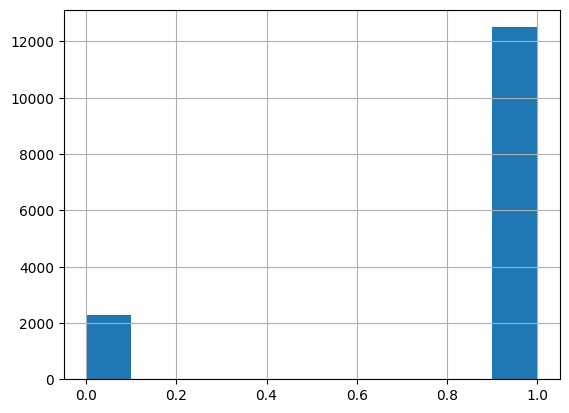

In [4]:
reviews['Sentiment'].hist()


#### Задание 2.

Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев. 

In [5]:
# размеченное и неразмеченное подмножества данных
reviews = shuffle(reviews)
labeled_reviews, unlabeled_reviews = train_test_split(reviews, train_size=0.5, random_state=42)
labeled_reviews


,Show,Sentiment,Review
14625,Forever,1,"With a distinct brand of pitch-black humor, su..."
10315,The Act,1,The series is so cleverly layered and edited t...
12603,The Queen's Gambit,0,While it is frustrating to see Black character...
3096,The Staircase,0,"The problem is, in a good fictional crime stor..."
2565,Waco,0,The show creates its own problems in telling t...
...,...,...,...
31,Mare of Easttown,1,Mare of Easttown won with the old television s...
5107,His Dark Materials,1,The season 2 premiere of His Dark Materials se...
14470,Dan Brown's The Lost Symbol,1,"If The Lost Symbol plays it right, the series ..."
11863,Squid Game,1,"Squid Game is a rousing, disturbing, candy-coa..."


In [6]:
labeled_reviews.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7395 entries, 14625 to 10872
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7395 non-null   object
 1   Sentiment  7395 non-null   int64 
 2   Review     7395 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [7]:
unlabeled_reviews.head()


,Show,Sentiment,Review
9384,The Haunting of Hill House,1,"Like this year's best horror film Hereditary, ..."
8525,Reacher,1,The television equivalent of an airport novel....
13132,The Crown,0,The show seriously falters with Diana... The C...
7719,The Boys,0,You finish each episode with a nasty taste in ...
4966,The Sex Lives of College Girls,1,A rare TV show that really delves into the mul...


In [8]:
unlabeled_reviews.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7396 entries, 9384 to 5516
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7396 non-null   object
 1   Sentiment  7396 non-null   int64 
 2   Review     7395 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [9]:
# Обучение модели на размеченных данных
def train_model(labeled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labeled_data['Review'])
    y = labeled_data['Sentiment']
    model = LogisticRegression()
    model.fit(x,y)
    return model, vect

model, vect = train_model(labeled_reviews)


In [10]:
unlabeled_reviews = unlabeled_reviews.dropna()
unlabeled_reviews.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7395 entries, 9384 to 5516
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Show       7395 non-null   object
 1   Sentiment  7395 non-null   int64 
 2   Review     7395 non-null   object
dtypes: int64(1), object(2)
memory usage: 231.1+ KB


In [11]:
x_unlabeled = vect.transform(unlabeled_reviews['Review'])
y_unlabeled_predicted = model.predict(x_unlabeled)


In [13]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)


In [14]:
uncertainty


array([0.50897656, 0.48865044, 0.53177423, ..., 0.87494185, 0.49905525,
       0.55689057])

In [15]:
# Выбираем 100 самых неопределенных точек данных, разметку которых нужно выполнить вручную
labeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]
labeled_reviews_new


,Show,Sentiment,Review
11201,Ramy,1,Ramy is still very funny and is as smart and e...
8818,You,1,You season three still remains television wort...
14732,The Great,1,"Clever, irreverent, and touching, Season 2 est..."
12391,Bridgerton,1,"Still beautiful, still fun and still excellent."
5670,Love Life,1,"Marcus doesn't always get it right, but this s..."
...,...,...,...
8726,Invincible,1,"For now, we'll simply say that Invincible is o..."
6395,Loki,1,"Nothing can prepare you for Loki, a mind-bendi..."
8141,The Orville,1,While still pulling from the storytelling conv...
12127,The Witcher,1,Yet The Witcher is still a pleasure to watch.


#### Задача 3.

Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [18]:
# Cохранение данных для ручной разметки
labeled_reviews_new.to_csv("part_reviews.csv", index=False)


In [20]:
# Загрузка данных после ручной разметки
labeled_reviews_new = pd.read_csv("part_reviews.csv", engine="python", encoding="utf-8", on_bad_lines="skip", encoding_errors="ignore")


In [25]:
labeled_reviews_new


,Show,Sentiment,Review
0,Ramy,1,Ramy is still very funny and is as smart and e...
1,You,1,You season three still remains television wort...
2,The Great,1,"Clever, irreverent, and touching, Season 2 est..."
3,Bridgerton,1,"Still beautiful, still fun and still excellent."
4,Love Life,1,"Marcus doesn't always get it right, but this s..."
...,...,...,...
95,Invincible,1,"For now, we'll simply say that Invincible is o..."
96,Loki,1,"Nothing can prepare you for Loki, a mind-bendi..."
97,The Orville,1,While still pulling from the storytelling conv...
98,The Witcher,1,Yet The Witcher is still a pleasure to watch.


#### Задача 4.

Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [26]:
labeled_reviews_united = pd.concat([labeled_reviews, labeled_reviews_new])


In [27]:
labeled_reviews_united


,Show,Sentiment,Review
14625,Forever,1,"With a distinct brand of pitch-black humor, su..."
10315,The Act,1,The series is so cleverly layered and edited t...
12603,The Queen's Gambit,0,While it is frustrating to see Black character...
3096,The Staircase,0,"The problem is, in a good fictional crime stor..."
2565,Waco,0,The show creates its own problems in telling t...
...,...,...,...
95,Invincible,1,"For now, we'll simply say that Invincible is o..."
96,Loki,1,"Nothing can prepare you for Loki, a mind-bendi..."
97,The Orville,1,While still pulling from the storytelling conv...
98,The Witcher,1,Yet The Witcher is still a pleasure to watch.


#### Задача 5.

Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [28]:
model, vect = train_model(labeled_reviews_united)


In [29]:
reviews_test = unlabeled_reviews
reviews_test


,Show,Sentiment,Review
9384,The Haunting of Hill House,1,"Like this year's best horror film Hereditary, ..."
8525,Reacher,1,The television equivalent of an airport novel....
13132,The Crown,0,The show seriously falters with Diana... The C...
7719,The Boys,0,You finish each episode with a nasty taste in ...
4966,The Sex Lives of College Girls,1,A rare TV show that really delves into the mul...
...,...,...,...
1843,Yellowjackets,1,"Gruesome, gripping and blackly comic, this tig..."
11568,The Lincoln Lawyer,1,"Some 10-episode shows seem stretched out, but ..."
1355,Lisey's Story,0,Director Pablo Larraín and a splendid cast led...
3889,The White Lotus,1,The 'eat the rich' genre is pleasurable becaus...


In [30]:
x_test = vect.transform(reviews_test['Review'])
y_test_predicted = model.predict(x_test)
y_test_predicted


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Задача 6.

Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [31]:
f1 = f1_score(reviews_test['Sentiment'], y_test_predicted)
f1


0.9179509760751504